# OLG

In [26]:
%load_ext autoreload
%autoreload 2

import numpy as np
from modelproject import OLGModelClass
from scipy import optimize
from modelproject import simulate_before_s, simulate_after_s, find_s_bracket, calc_euler_error
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The OLG Model


**(i) The household's maximisation problem**
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\mathbb{E}[p_{t}]\cdot\beta\frac{C_{2t+1}^{1-\sigma}}{1-\sigma},\,\,\,0 < p < 1, \beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}N_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}N_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$
    


where:

 $C_1t$ is the consumption at period t

 $C_{2t+1}$ is the consumption at period t+1
  
 $w_{t}$ is the wage

 $r_{t+1}$ is the interest rate
  
 $\mathbb{E}[p_{t}]$ is the expected survival probability
  
 $\beta$ is the discount factor , 0<$\beta$ < 1 


**(ii) The production function**   
$$
\begin{aligned}
Y_{t}=F(K_{t-1},L_{t})=(\alpha K_{t-1}^{-\theta}+(1-\alpha)L_{t}^{-\theta})^{\frac{1}{-\theta}},\,\,\,\theta>-1,\alpha\in(0,1)
\end{aligned}
$$
    

Profits:    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}




**(iii) Population:**
Labour force:
$$
\begin{aligned}
Pop^{young}_{t+1}=L_{t+1} = (1 + n)  L_t
\end{aligned}
$$
Old generation:
$$
\begin{aligned}
Pop^{old}_{t+1}=p_{t}\cdot Pop^{young}_{t}
\end{aligned}
$$

**(iv) Capital:**
$$
\begin{aligned}
K_{t+1} = (1+\delta)K_t+I_t
\end{aligned}
$$

### The OLG-model with an Increasing Population and Non-Zero Probability of Premature Death

We explore the link between the OLG model's population dynamics and COVID-19 by extending the model to include the impact of the pandemic on population growth rates and survival probabilities.Effectively this means that the probability of surviving is just an additional discount rate.
The surviival probability has been intially set to 95% for all periods (with population size increrasing by 2% in each period) to imply times before the pandemic hit.

# Population Growth

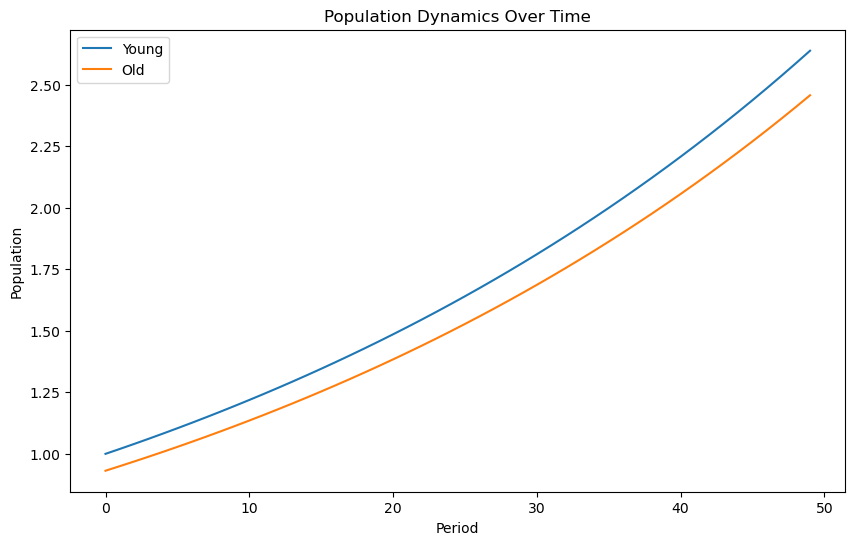

In [32]:
# a. create and simulate the model
model = OLGModelClass(do_print=False)
par = model.par
sim = model.sim

p = 0.95 # survival probability
par.n = 0.02 # population growth
par.p = np.full(par.simT, p) 
par.exp_p = np.concatenate(([0.95], par.p)) # static expected survival probability in period t which is equal to that of period t-1 

model.simulate(do_print=False)


# b. plot the populations over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.par.pop_young, label="Young")
plt.plot(range(model.par.simT), model.par.pop_old, label="Old")
plt.xlabel("Period")
plt.ylabel("Population")
plt.legend()
plt.title("Population Dynamics Over Time")
plt.show()

# Capital

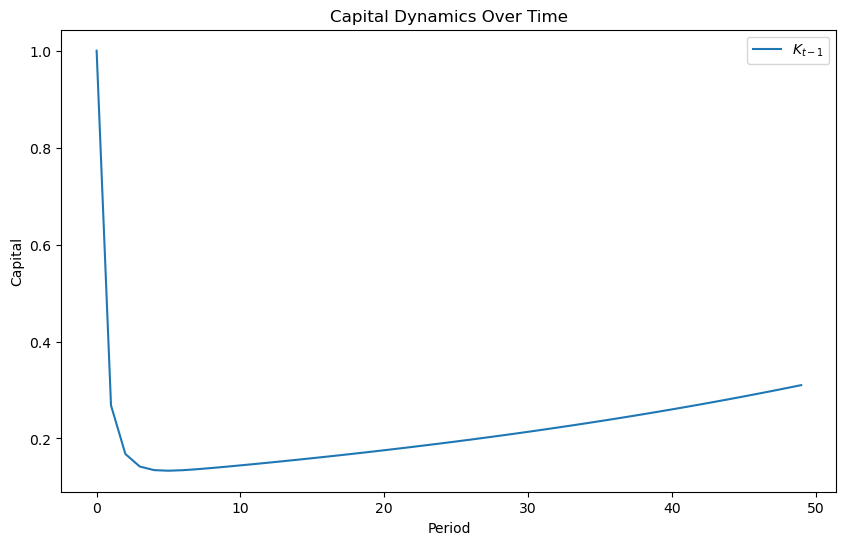

In [28]:
# a. plot the lagged capital over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag, label=r"$K_{t-1}$")
plt.xlabel("Period")
plt.ylabel("Capital")
plt.legend()
plt.title("Capital Dynamics Over Time")
plt.show()


# Capital Share of Income

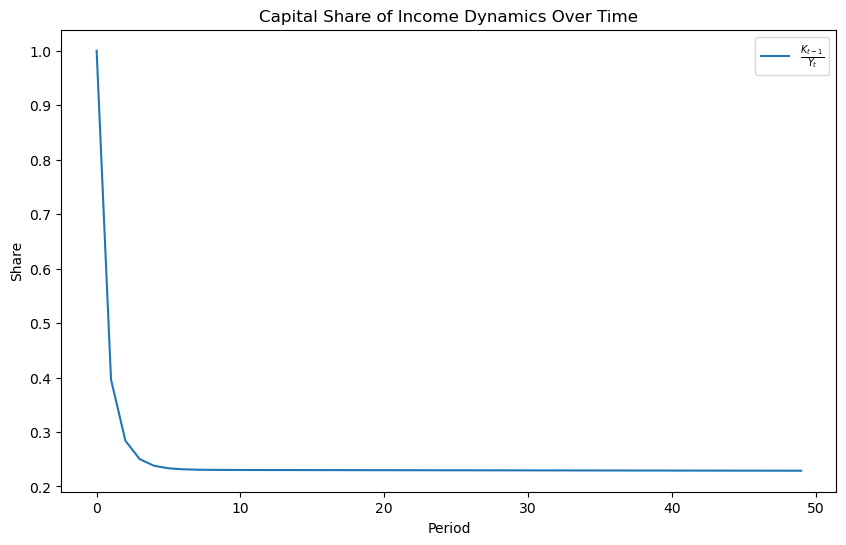

In [29]:
# a. plot the lagged capital share of income over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"$\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share")
plt.legend()
plt.title("Capital Share of Income Dynamics Over Time")
plt.show()

<font color='red'> You need to describe the algorithm used for the solution - just showing the solution and simulation is not sufficient. This is particularly the case, when your code is so heavily based on lecture code. Remember, you only get points for work you have done yourselves, so at the very minimum you need to show how you use the lecture code to analyze your specific problem.

You should probably also comment a bit on what you are simulating. What are the mechanisms behind the convergence process? What are the differences between your model and the lecture model?

Finally, in the standard OLG model, capital is owned by the old generation. Since in your model, 5 pct. of the elderly die prematurely, you need to take a stance on what happens to the capital, they own. They way you write it above, it is redistributed among the remaining old generation (because they receive interest on last periods savings). 

# Comparative Statistics

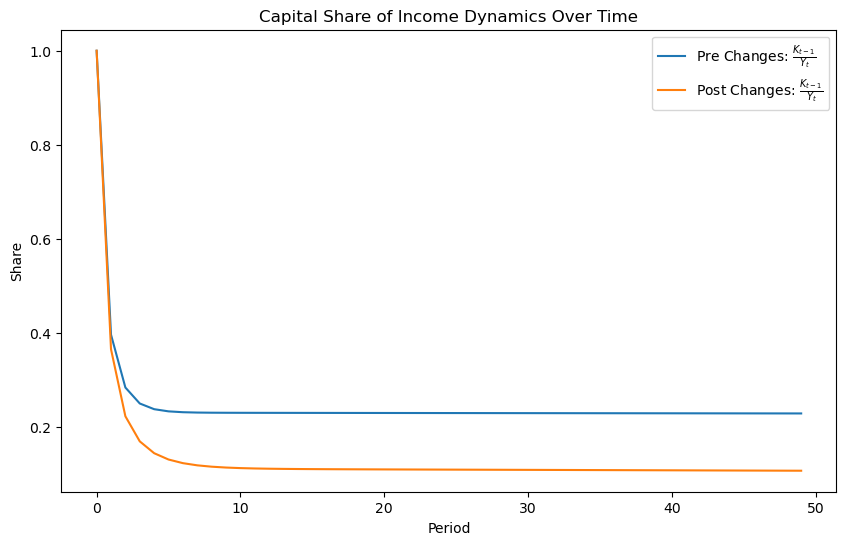

In [23]:
# a. parameter changes

# i. households
par.sigma = 1.75 # CRRA coefficient - decreased by 0.25
par.beta = 1/1.50 # discount factor - increased denominator by 0.1

# ii. firms
par.alpha = 0.40 # capital weight - increased by 0.1
par.theta = 0.1 # substitution parameter - increased by 0.05
par.delta = 0.30 # depreciation rat - decreased by 0.2

# iii. government
par.tau_w = 0.20 # labor income tax - increased by 0.1
par.tau_r = 0.10 # capital income tax - decreased by 0.1

# b. plot the lagged capital share of income pre and post the parameter changes
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"Pre Changes: $\frac{K_{t-1}}{Y_t}$")
model.simulate(do_print=False)
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"Post Changes: $\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share")
plt.legend()
plt.title("Capital Share of Income Dynamics Over Time")
plt.show()


<font color='red'> Please describe what you are analyzing here, and what the point of this simulation is.

An advantage of simulating models is that we can change one parameter at a time, simulate and by comparing to the base, we can isolate the effect of the parameter we change - it is a true ceteris paribus scenario, because we have explicitely held all other factors fixed. Above, you are changing 7 parameters, and the difference between the two simulations reflect the effects of all 7 parameters. We cannot disentagle the effects from each other, and therefore it is very difficult to say, what is actually happening. 

# Pandemic

The survival probability has been set to 95% for all periods by default.From periods 10 to 20, the probability has been adjusted to 0.6 

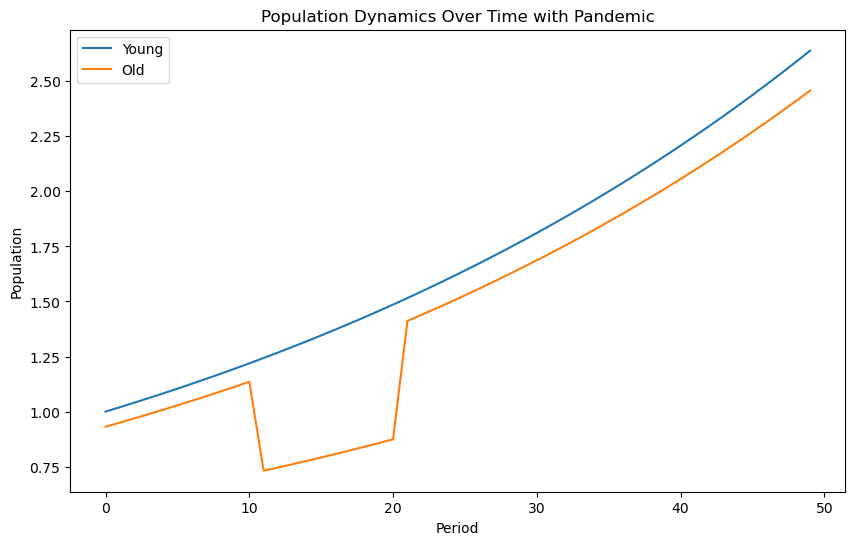

In [30]:
# a. create and simulate the model
model = OLGModelClass(do_print=False)
par = model.par
sim = model.sim 

p = 0.95 # survival probability
par.n = 0.02 # population growth
par.p = np.full(par.simT, p) 
par.p[10:20] = 0.6 # temporary pandemic decreases the survival probability
par.exp_p = par.exp_p = np.concatenate(([0.95], par.p)) # static expected survival probability in period t+1 which is equal to that of period t 

model.simulate(do_print=False)

# b. plot the populations over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.par.pop_young, label="Young")
plt.plot(range(model.par.simT), model.par.pop_old, label="Old")
plt.xlabel("Period")
plt.ylabel("Population")
plt.legend()
plt.title("Population Dynamics Over Time with Pandemic")
plt.show()


# Capital

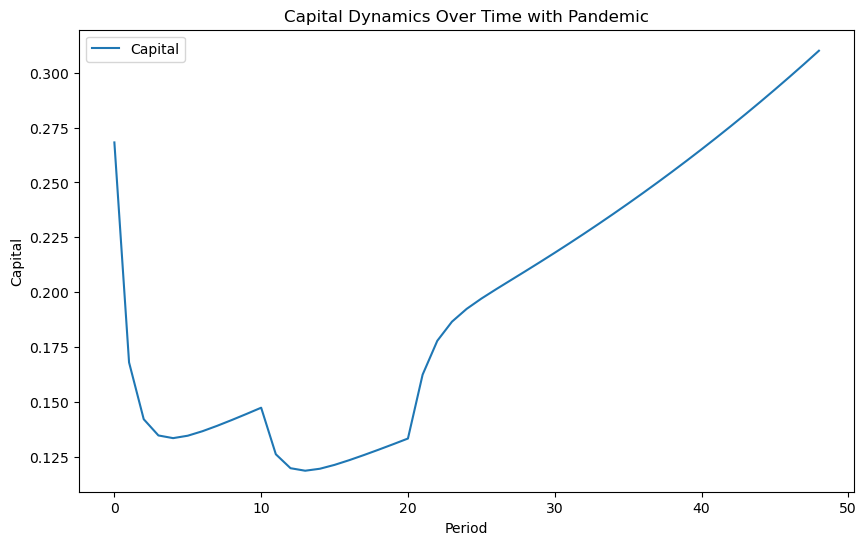

In [31]:
# a. plot the lagged capital over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K, label="Capital")
plt.xlabel("Period")
plt.ylabel("Capital")
plt.legend()
plt.title("Capital Dynamics Over Time with Pandemic")
plt.show()


<font color='red'> Note how the effect on capital takes place the period before the population drop. In the solution, you include p[t+1] in the euler equation, this means that agents know beforehand that the probability of death is going to increase and incorporate that in their savings decisions. Is that realistic? 

I was wondering why capital seems to increase - wouldn't we expect a fall in savings if the young people know that they will probablly die in the next period? Turns out that the way you wrote the capital tansition in your code, capital drops by (1-p)K between each period - so capital owned by those that die seems to vanish into thin air. This gives rise to some weird capital dynamics... I've marked the points in your code, where that assumption shows up.

# Capital Share of Income

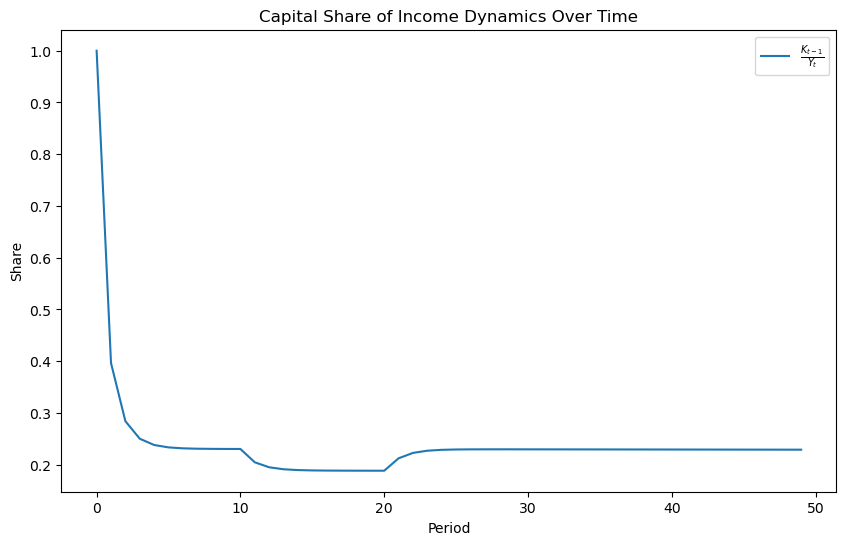

In [18]:
# a. plot the lagged capital share of income over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"$\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share")
plt.legend()
plt.title("Capital Share of Income Dynamics Over Time")
plt.show()

# Comparative Statistics

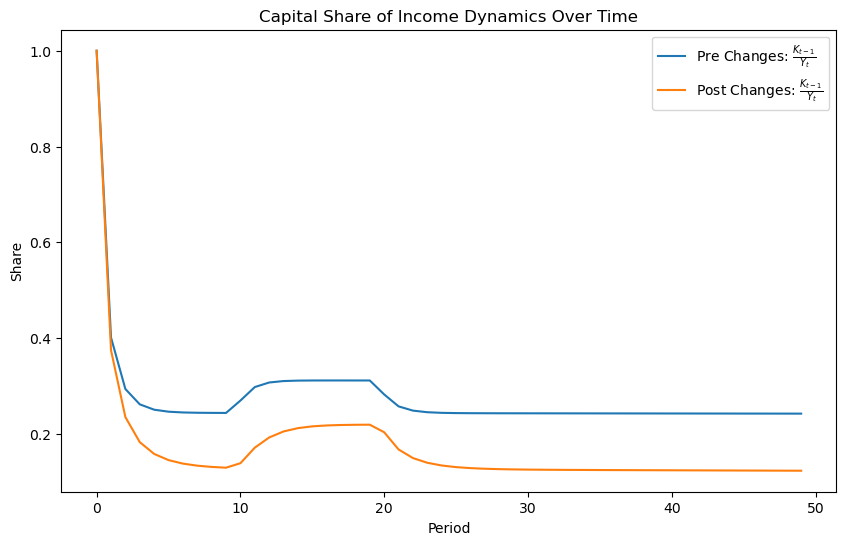

In [162]:
# a. parameter changes

# i. households
par.sigma = 1.75 # CRRA coefficient - decreased by 0.25
par.beta = 1/1.50 # discount factor - increased denominator by 0.1

# ii. firms
par.alpha = 0.40 # capital weight - increased by 0.1
par.theta = 0.1 # substitution parameter - increased by 0.05
par.delta = 0.30 # depreciation rat - decreased by 0.2

# iii. government
par.tau_w = 0.20 # labor income tax - increased by 0.1
par.tau_r = 0.10 # capital income tax - decreased by 0.1

# b. plot the lagged capital share of income pre and post the parameter changes
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"Pre Changes: $\frac{K_{t-1}}{Y_t}$")
model.simulate(do_print=False)
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"Post Changes: $\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share")
plt.legend()
plt.title("Capital Share of Income Dynamics Over Time")
plt.show()


<font color='red'> same comment as before - one parameter change at a time, or we'll have no idea what we are actually looking at.